1\. Write a function that converts number representation (bin<->dec<->hex)

In [13]:
def base_conv (x, init_base='dec'):     
    if init_base=='dec':
        decx = x
        binx = bin(decx)
        hexx = hex(decx)
    elif init_base=='bin':
        binx = x
        decx = int(str(binx), 2)
        hexx = hex(decx)
        binx = bin(decx)
    elif init_base=='hex':
        hexx = x
        decx = int(str(hexx),16)
        binx = bin(decx)
    else:
        #consider also an error
        return('unrecognized base')
    return binx, decx, hexx

print(base_conv(42))
print(base_conv(110111, 'bin'))
print(base_conv(0x2a, 'hex')) 
print(base_conv(234, 'something'))

        

('0b101010', 42, '0x2a')
('0b110111', 55, '0x37')
('0b1000010', 66, 42)
unrecognized base


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [79]:
def bit2float(xs):
    sign = xs[0]
    exp = int(xs[1:9],2)-127
    mant = 1.0
    for i in range(9,32):
        mant = mant + int(xs[i])*2**(-(i-8))
    fl = ((-1)**int(sign))*(mant*2**exp) 
    return fl

print(bit2float('11000000100100100001000000110000'))
    

-4.564476013183594


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [92]:
import math
x = 1.
while(x/2>0):
    x = x/2

print("min value:" + str(x)) 

x = 1.
#use math.inf for the biggest representable number
while(x*2<math.inf):
    x = x*2

print("max value:" + str(x))

min value:5e-324
max value:8.98846567431158e+307


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [80]:
prec = float(1)

while float(1)+float(prec) != float(1):
    prec_last = prec
    prec = float(prec) / float(2)
    
print(prec_last)


2.220446049250313e-16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [1]:
def quadratic(a,b,c):
    x = []
    x.append((-b+(b**2-4*a*c)**0.5)/(2*a))
    x.append((-b-(b**2-4*a*c)**0.5)/(2*a))
    return x

print(quadratic(0.001,1000,0.001))

def quadratic2(a,b,c):
    x = []
    x.append((-b+(b**2-4*a*c)**0.5)/(2*a)*(-b-(b**2-4*a*c)**0.5)/(-b-(b**2-4*a*c)**0.5))
    x.append((-b-(b**2-4*a*c)**0.5)/(2*a)*(-b+(b**2-4*a*c)**0.5)/(-b+(b**2-4*a*c)**0.5))
    return x

print(quadratic2(0.001,1000,0.001))
import math as m
def quadratic3(a,b,c):
    #using logarithm trick
    x = []
    e = m.e
    x.append((-b/(2*a)+e**((0.5*m.log(b**2-4*a*c))-m.log(2*a))))
    x.append((-b/(2*a)-e**((0.5*m.log(b**2-4*a*c))-m.log(2*a))))
    return x

print(quadratic3(0.001,1000,0.001))

def quadratic4(a,b,c):
    x = []
    e = m.e
    x.append((-b/(2*a)+e**((0.5*m.log(b**2-4*a*c))-m.log(2*a)))*(-b-(b**2-4*a*c)**0.5)/(-b-(b**2-4*a*c)**0.5))
    x.append((-b/(2*a)-e**((0.5*m.log(b**2-4*a*c))-m.log(2*a)))*(-b+(b**2-4*a*c)**0.5)/(-b+(b**2-4*a*c)**0.5))
    return x

print(quadratic4(0.001,1000,0.001))

#quadratic 3 and 4 gives the same output so using the logarithm is the way to make the function accurate in every case

[-9.999894245993346e-07, -999999.999999]
[-9.999894245993346e-07, -999999.9999989999]
[-1.0007061064243317e-06, -999999.9999989993]
[-1.0007061064243317e-06, -999999.9999989993]


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

[2, 4, 6, 8, 10, 12, 14]
[3.0100000000000016, 3.0000999999968414, 3.0000010000641453, 2.999999981767587, 3.000000248221113, 3.000266701747023, 2.9753977059954195]
[0.010000000000001563, 9.999999684140448e-05, 1.0000641452734271e-06, -1.823241291276645e-08, 2.482211129972711e-07, 0.00026670174702303484, -0.02460229400458047]


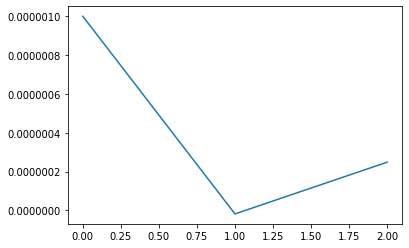

In [22]:
def f(x):
    return x*(x+1)

def dfdx(delta, x=1):
    return (f(x+delta)-f(x))/delta

# result should be 3.0

delta_l = [i for i in range(1,15) if i%2==0]
print(delta_l)

res = []
for i in range(len(delta_l)):
    res.append(dfdx(10**(-delta_l[i])))

print(res)
res_diff = []
for n in res:
    res_diff.append(n-3)

print(res_diff)
from matplotlib import pyplot as plt
plt.plot(res_diff[2:5])


#the accuracy should improve while reducing delta, according to the definition of limit.
# but with a delta lower than 10e-8 we get precision errors.
#the best accuracy is obtained for delta=10e-8

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


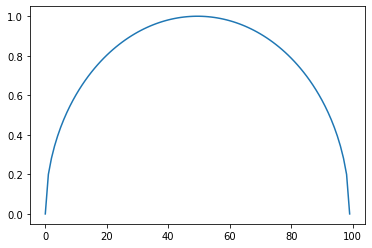

In [30]:
import numpy as np


def semici(x, r):
    return (r**2-x**2)**0.5

#let's check if the equation is doing a semicircle
l = []
ax = np.linspace(-1,1,100)
for i in ax:
#     print(semici(i))
    l.append(semici(i,1))
from matplotlib import pyplot as plt
plt.plot(l)

In [34]:
def semici(x, r):
    return (r**2-x**2)**0.5

def semicircle_integral(n, r=1):
    I = 0
    ax = np.linspace(-r,r,n)
    for i in ax:
        I += (2/n)*semici(i,r)
    return I

print(semicircle_integral(100))
%timeit semicircle_integral(100)
print()
print(semicircle_integral(1000))
%timeit semicircle_integral(1000)
print()
print(semicircle_integral(10000))
%timeit semicircle_integral(10000)
print()
print(semicircle_integral(100000))
%timeit semicircle_integral(100000)
print()
print(semicircle_integral(1000000))
%timeit semicircle_integral(1000000)

#we reach one second of runtime for a value of N between 10e5 and 10e6
#the improvement in the accuracy is on the 10e-6 magnitude

1.5534179294048955
147 µs ± 1.85 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

1.5691729158636207
1.25 ms ± 14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

1.570637583999452
12.1 ms ± 110 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

1.570780566239904
121 ms ± 1.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

1.5707947543355443
1.23 s ± 27.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
#if the increasing of the running time is quasi linear, we should have 
#about a minute of running time with 50,000,000
print(semicircle_integral(50000000))

1.5707962953742862


In [ ]:
#it is close to the real value 1.57079632679 up until the sixth decimal digit, not a big improvement 